# CLASSIFICATION

# Logistic Regression in Python 

## Logistic Regression in Python with scikit-learn: Example 1

Step 1. import packages, functions, and classes

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Step 2. get data in pratice, create arrays for input (x) and output (y) values:

In [5]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [6]:
print(x, y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


Interpretasi

x memiliki dua dimensi yaitu:
1. satu kolom untuk satu masukan
2. sepuluh baris, masing masing sesuai dengan satu pengamatan

y adalah satu dimensi dengan sepuluh item.
ini hanya berisi nol dan satu karena ini adlah masalah klasifikasi biner

Step 3. create a model and train it

In [7]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [8]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [9]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [10]:
model.classes_

array([0, 1])

In [11]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


Step 4. evaluate the model

In [12]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [13]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [14]:
model.score(x, y)

0.9

In [15]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

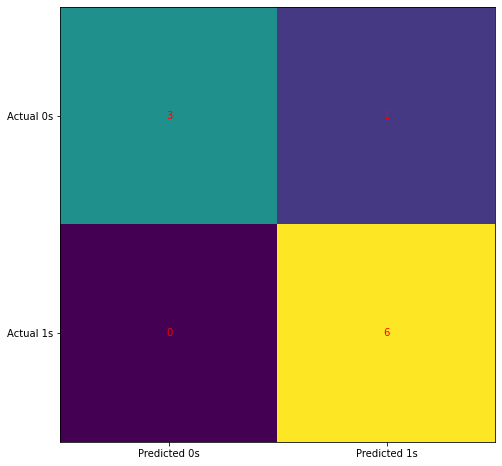

In [16]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [17]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



Improve the Model

In [20]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [21]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [22]:
print(model.predict_proba(x))

[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]


In [23]:
print(model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


In [24]:
model.score(x, y)

1.0

In [25]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [26]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Logistic Regression in Python: Handwriting Recognition

In [27]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Step 2. Get data

In [28]:
x, y = load_digits(return_X_y=True)

In [29]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [35]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

Step 3. Create a model and train it

In [36]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                          random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

Step 4. Evaluate the model

In [37]:
y_pred = model.predict(x_test)

In [38]:
model.score(x_train, y_train)

0.964509394572025

In [39]:
model.score(x_test, y_test)

0.8805555555555555

In [40]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 1,  3, 28,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  3,  0],
       [ 0,  3,  0,  0, 23,  0,  0,  1,  3,  0],
       [ 0,  1,  0,  0,  0, 38,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 40,  0,  3,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 34,  4,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 10, 30]], dtype=int64)

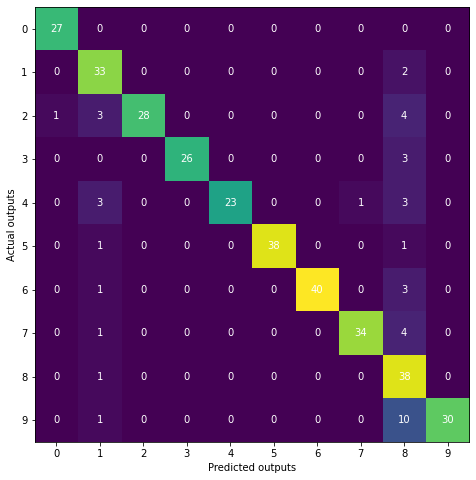

In [41]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.75      0.94      0.84        35
           2       1.00      0.78      0.88        36
           3       1.00      0.90      0.95        29
           4       1.00      0.77      0.87        30
           5       1.00      0.95      0.97        40
           6       1.00      0.91      0.95        44
           7       0.97      0.87      0.92        39
           8       0.56      0.97      0.71        39
           9       1.00      0.73      0.85        41

    accuracy                           0.88       360
   macro avg       0.92      0.88      0.89       360
weighted avg       0.92      0.88      0.89       360



# K-Nearest Neighbor (KNN)

## KNN in Python with scikit-learn: Example 1

In [43]:
weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']

temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [44]:
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

#converting string labels into numbers
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [45]:
#converting string labels into numbers
temp_encoded=le.fit_transform(temp)

label=le.fit_transform(play)
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


#### Combining Features

In [47]:
features=list(zip(weather_encoded,temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


#### Generating Model

In [48]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(features,label)
predicted = model.predict([[0,2]])
print(predicted)

[1]


## KNN on Python with scikit-learn: KNN with Multiple Labels

In [49]:
from sklearn import datasets
wine = datasets.load_wine()

#### Exploring Data

In [52]:
print(wine.feature_names) #print the name of features

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [53]:
#print the label species (class_0, class_1, class_2)
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [54]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [55]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [56]:
#print data(feature) shape
print(wine.data.shape)

(178, 13)


In [57]:
#print target(or label) shape
print(wine.target.shape)

(178,)


#### Splitting Data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

#### Generating Model for K=5

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#### Model Evaluation for k=5

In [60]:
from sklearn import metrics

#model accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7407407407407407


maka kita mendapatkan tingkat klasifikasi 74%

#### Re-generating Model for K=7

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [62]:
from sklearn import metrics

#model accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222


maka didapat tingkat klasifikasi 72,22%

Sekarang improve model dan mencari tahu nilai k yang optimal.

In [63]:
error = []

#calculating error for k value between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

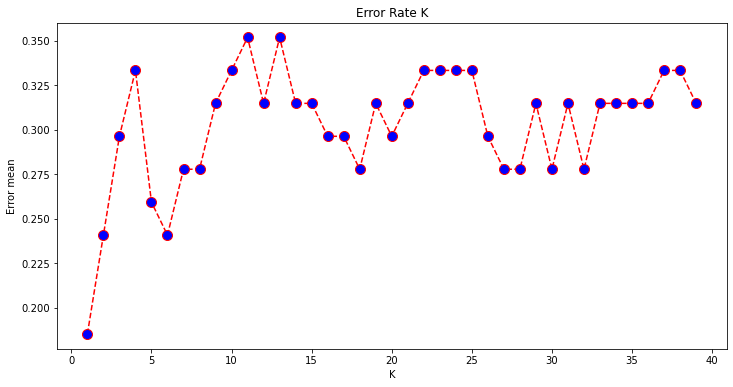

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
        linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

dari plot diatas terlihat nilai error terkecil adalah 0,1 pada K=1

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn import metrics

#model accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8148148148148148
